In [1]:
%%time

import pandas as pd

# Load the files
train_calendar = pd.read_csv('/kaggle/input/rohlik-orders-forecasting-challenge/train_calendar.csv')
test_calendar = pd.read_csv('/kaggle/input/rohlik-orders-forecasting-challenge/test_calendar.csv')
train_data = pd.read_csv('/kaggle/input/rohlik-orders-forecasting-challenge/train.csv')
test_data = pd.read_csv('/kaggle/input/rohlik-orders-forecasting-challenge/test.csv')
sample_submission = pd.read_csv('/kaggle/input/rohlik-orders-forecasting-challenge/solution_example.csv')

CPU times: user 409 ms, sys: 50.6 ms, total: 459 ms
Wall time: 500 ms


In [2]:
%%time

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7340 entries, 0 to 7339
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   warehouse               7340 non-null   object 
 1   date                    7340 non-null   object 
 2   orders                  7340 non-null   float64
 3   holiday_name            218 non-null    object 
 4   holiday                 7340 non-null   int64  
 5   shutdown                7340 non-null   int64  
 6   mini_shutdown           7340 non-null   int64  
 7   shops_closed            7340 non-null   int64  
 8   winter_school_holidays  7340 non-null   int64  
 9   school_holidays         7340 non-null   int64  
 10  blackout                7340 non-null   int64  
 11  mov_change              7340 non-null   float64
 12  frankfurt_shutdown      7340 non-null   int64  
 13  precipitation           7070 non-null   float64
 14  snow                    7070 non-null   

In [3]:
%%time 

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   warehouse               397 non-null    object
 1   date                    397 non-null    object
 2   holiday_name            17 non-null     object
 3   holiday                 397 non-null    int64 
 4   shops_closed            397 non-null    int64 
 5   winter_school_holidays  397 non-null    int64 
 6   school_holidays         397 non-null    int64 
 7   id                      397 non-null    object
dtypes: int64(4), object(4)
memory usage: 24.9+ KB
CPU times: user 6.23 ms, sys: 837 µs, total: 7.07 ms
Wall time: 6.8 ms


In [4]:
%%time

# Convert the 'date' column to datetime format 
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

CPU times: user 10.4 ms, sys: 79 µs, total: 10.5 ms
Wall time: 11.3 ms


In [5]:
%%time

# Set the 'date' column as the index 
train_data.set_index('date', inplace=True)
test_data.set_index('date', inplace=True)

CPU times: user 1.41 ms, sys: 0 ns, total: 1.41 ms
Wall time: 1.37 ms


In [6]:
%%time

# Sort the data by the date index for time series analysis
train_data.sort_index(inplace=True)
test_data.sort_index(inplace=True)

CPU times: user 4.49 ms, sys: 102 µs, total: 4.59 ms
Wall time: 7.15 ms


In [7]:
%%time

# Fill NaN values in numeric columns with 0 and text columns with 'unknown'
train_data = train_data.fillna({
    col: 0 if train_data[col].dtype in ['float64', 'int64'] else 'unknown' for col in train_data.columns
})

train_data.head()

CPU times: user 11.6 ms, sys: 1.12 ms, total: 12.7 ms
Wall time: 12 ms


,warehouse,orders,holiday_name,holiday,shutdown,mini_shutdown,shops_closed,winter_school_holidays,school_holidays,blackout,mov_change,frankfurt_shutdown,precipitation,snow,user_activity_1,user_activity_2,id
date,,,,,,,,,,,,,,,,,
2020-12-05,Prague_1,6895.0,unknown,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1722.0,32575.0,Prague_1_2020-12-05
2020-12-05,Prague_2,4154.0,unknown,0,0,0,0,0,0,0,0.0,0,0.0,0.0,1317.0,18462.0,Prague_2_2020-12-05
2020-12-05,Prague_3,4091.0,unknown,0,0,0,0,0,0,0,0.0,0,0.0,0.0,964.0,17693.0,Prague_3_2020-12-05
2020-12-05,Budapest_1,4623.0,unknown,0,0,0,0,0,0,0,0.0,0,0.3,0.0,3046.0,17840.0,Budapest_1_2020-12-05
2020-12-05,Brno_1,6447.0,unknown,0,0,0,0,0,0,0,0.0,0,0.0,0.0,2332.0,27392.0,Brno_1_2020-12-05


In [8]:
%%time

test_data = test_data.fillna({
    col: 0 if test_data[col].dtype in ['float64', 'int64'] else 'unknown' for col in test_data.columns
})

test_data.head()

CPU times: user 4.38 ms, sys: 0 ns, total: 4.38 ms
Wall time: 3.89 ms


,warehouse,holiday_name,holiday,shops_closed,winter_school_holidays,school_holidays,id
date,,,,,,,
2024-03-16,Prague_1,unknown,0,0,0,0,Prague_1_2024-03-16
2024-03-16,Prague_3,unknown,0,0,0,0,Prague_3_2024-03-16
2024-03-16,Brno_1,unknown,0,0,0,0,Brno_1_2024-03-16
2024-03-16,Munich_1,unknown,0,0,0,0,Munich_1_2024-03-16
2024-03-16,Frankfurt_1,unknown,0,0,0,0,Frankfurt_1_2024-03-16


In [9]:
%%time

# Slicing the data between two specific dates: '2020-12-01' to '2020-12-10'
start_date = '2020-12-01'
end_date = '2020-12-10'

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.68 µs


In [10]:
%%time

# Slicing both train and test data within this date range
train_data_slice = train_data[start_date:end_date]
test_data_slice = test_data[start_date:end_date]

CPU times: user 4.72 ms, sys: 148 µs, total: 4.87 ms
Wall time: 9.4 ms


In [11]:
%%time

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Select only numeric columns for resampling
numeric_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

# Aggregate data weekly and calculate the mean for numeric columns
weekly_resample = train_data[numeric_columns].resample('W').mean()

CPU times: user 883 ms, sys: 110 ms, total: 992 ms
Wall time: 1.04 s


In [12]:
%%time

# Apply a 7-day rolling mean to numeric columns
rolling_mean = train_data['orders'].rolling(window=7).mean()

CPU times: user 1.8 ms, sys: 601 µs, total: 2.4 ms
Wall time: 1.81 ms


In [13]:
%%time

# Shift the data by 1 day backward
shifted_data = train_data.shift(1)

CPU times: user 2.2 ms, sys: 35 µs, total: 2.23 ms
Wall time: 1.87 ms


<Figure size 1200x800 with 0 Axes>

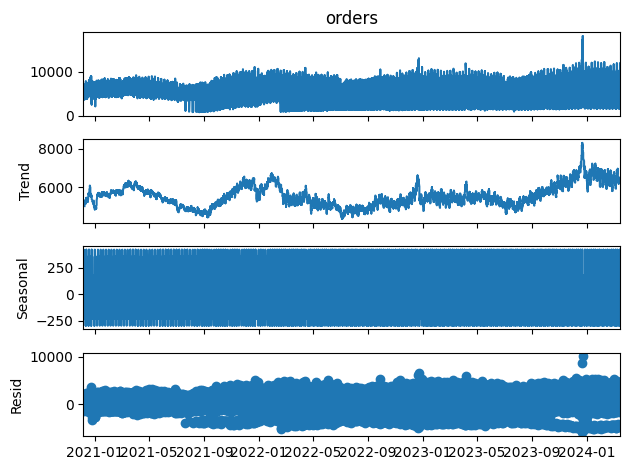

CPU times: user 2.28 s, sys: 353 ms, total: 2.63 s
Wall time: 2.12 s


In [14]:
%%time

# Decompose the 'orders' data into trend, seasonal, and residual components
decompose_result = seasonal_decompose(train_data['orders'], model='additive', period=30)

# Plotting the decomposition
plt.figure(figsize=(12, 8))
decompose_result.plot()
plt.show()

In [15]:
%%time

weekly_resample.head(), rolling_mean.head(), shifted_data.head()

CPU times: user 544 µs, sys: 0 ns, total: 544 µs
Wall time: 552 µs


(                 orders   holiday  shutdown  mini_shutdown  shops_closed  \
 date                                                                       
 2020-12-06  5031.700000  0.000000       0.0            0.0      0.000000   
 2020-12-13  5204.800000  0.000000       0.0            0.0      0.000000   
 2020-12-20  5531.914286  0.000000       0.0            0.0      0.000000   
 2020-12-27  5525.241379  0.310345       0.0            0.0      0.137931   
 2021-01-03  4996.705882  0.117647       0.0            0.0      0.117647   
 
             winter_school_holidays  school_holidays  blackout  mov_change  \
 date                                                                        
 2020-12-06                     0.0              0.0       0.0         0.0   
 2020-12-13                     0.0              0.0       0.0         0.0   
 2020-12-20                     0.0              0.0       0.0         0.0   
 2020-12-27                     0.0              0.0       0.0       

In [16]:
%%time

# Create lagged columns (e.g., previous day's 'orders')
train_data['orders_lag_1'] = train_data['orders'].shift(1)

train_data[['orders', 'orders_lag_1']].head()

CPU times: user 2.08 ms, sys: 14 µs, total: 2.1 ms
Wall time: 1.87 ms


,orders,orders_lag_1
date,,
2020-12-05,6895.0,NaN
2020-12-05,4154.0,6895.0
2020-12-05,4091.0,4154.0
2020-12-05,4623.0,4091.0
2020-12-05,6447.0,4623.0


In [17]:
%%time 

# Fill the missing value in 'orders_lag_1' with 0
train_data['orders_lag_1'].fillna(0, inplace=True)

CPU times: user 1.18 ms, sys: 29 µs, total: 1.21 ms
Wall time: 999 µs


<timed eval>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [18]:
%%time

from statsmodels.tsa.stattools import adfuller, acf
import numpy as np

# Descriptive Statistics for numeric columns
descriptive_stats = train_data.describe()

CPU times: user 110 ms, sys: 9.3 ms, total: 119 ms
Wall time: 141 ms


In [19]:
%%time

# Calculate daily difference to detect trend
train_data['order_diff'] = train_data['orders'].diff()

CPU times: user 649 µs, sys: 109 µs, total: 758 µs
Wall time: 1.95 ms


In [20]:
%%time

# Calculate the autocorrelation for the 'orders' column
autocorr_values = acf(train_data['orders'].dropna(), nlags=30)

CPU times: user 325 µs, sys: 1.73 ms, total: 2.05 ms
Wall time: 1.81 ms


<timed exec>:13: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.


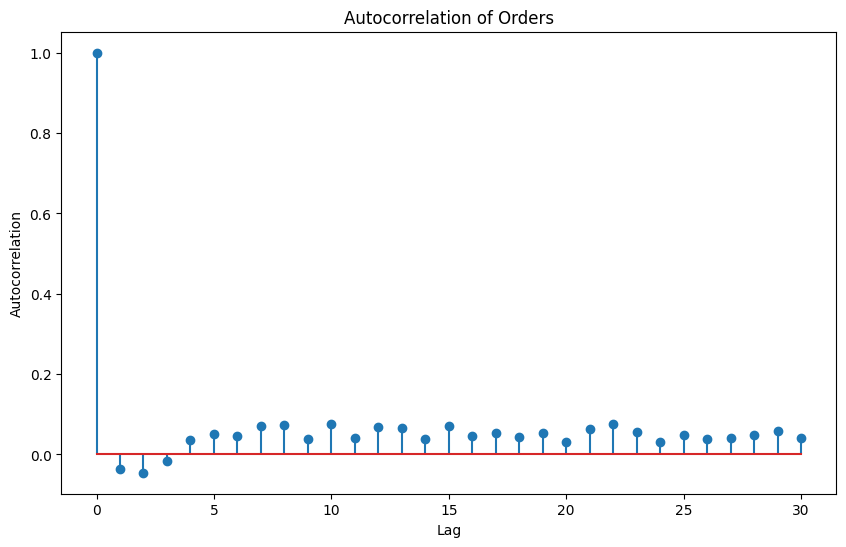

CPU times: user 1.6 s, sys: 1.36 s, total: 2.96 s
Wall time: 994 ms


In [21]:
%%time

# Perform the Augmented Dickey-Fuller test to check for stationarity
adf_result = adfuller(train_data['orders'].dropna())

# Prepare ADF test results
adf_output = {
    'ADF Statistic': adf_result[0],
    'p-value': adf_result[1],
    'Critical Values': adf_result[4]
}

# Plot autocorrelation
plt.figure(figsize=(10, 6))
plt.stem(autocorr_values, use_line_collection=True)
plt.title('Autocorrelation of Orders')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

In [22]:
%%time

import numpy as np
from hmmlearn.hmm import GaussianHMM
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

# Prepare the data
X = train_data['orders'].values.reshape(-1, 1)

CPU times: user 322 ms, sys: 61 ms, total: 384 ms
Wall time: 624 ms


In [23]:
%%time

# Split the data into training and testing sets 
X_train, X_test = train_test_split(X, test_size=0.2, shuffle=False)

CPU times: user 767 µs, sys: 241 µs, total: 1.01 ms
Wall time: 784 µs


In [24]:
%%time

# Define the Hidden Markov Model 
n_hidden_states = 4
hmm_model = GaussianHMM(n_components=n_hidden_states, covariance_type="diag", n_iter=1000)

CPU times: user 17 µs, sys: 5 µs, total: 22 µs
Wall time: 24.3 µs


In [25]:
%%time

# Fit the model to the 'orders' data
hmm_model.fit(X_train)

CPU times: user 2.67 s, sys: 2.14 s, total: 4.81 s
Wall time: 1.27 s


GaussianHMM(n_components=4, n_iter=1000)

In [26]:
%%time

# Make predictions 
hidden_states_test = hmm_model.predict(X_test)
y_pred = hmm_model.means_[hidden_states_test]

CPU times: user 2 ms, sys: 9.05 ms, total: 11 ms
Wall time: 3.52 ms


In [27]:
%%time

# Calculate MAPE between the actual and predicted 'orders'
mape = mean_absolute_percentage_error(X_test.flatten(), y_pred.flatten())

mape

CPU times: user 2.07 ms, sys: 1.03 ms, total: 3.1 ms
Wall time: 1.14 ms


0.2770135536543033

In [29]:
%%time

from hmmlearn.hmm import GaussianHMM
import numpy as np
import pandas as pd

# Select a warehouse and prepare data
selected_warehouse = 'Prague_1'
warehouse_data = train_data[train_data['warehouse'] == selected_warehouse]

CPU times: user 4.98 ms, sys: 436 µs, total: 5.41 ms
Wall time: 4.49 ms


In [30]:
%%time

# Use the 'orders' column as the time series data for the HMM
X = warehouse_data['orders'].values.reshape(-1, 1)

CPU times: user 77 µs, sys: 34 µs, total: 111 µs
Wall time: 116 µs


In [31]:
%%time

# Define the Hidden Markov Model 
n_hidden_states = 4
hmm_model = GaussianHMM(n_components=n_hidden_states, covariance_type="diag", n_iter=1000)

CPU times: user 17 µs, sys: 8 µs, total: 25 µs
Wall time: 27.7 µs


In [32]:
%%time

# Fit the model 
hmm_model.fit(X)

CPU times: user 479 ms, sys: 5.02 ms, total: 484 ms
Wall time: 377 ms


GaussianHMM(n_components=4, n_iter=1000)

In [33]:
%%time

# Predict hidden states for the observed data and forecast for the next 60 days
hidden_states = hmm_model.predict(X)

CPU times: user 1.86 ms, sys: 365 µs, total: 2.22 ms
Wall time: 2.27 ms


In [34]:
%%time

# To predict the next 60 days, we need to simulate the hidden states for 60 days
# Simulate hidden state transitions for the next 60 days
simulated_hidden_states = [np.random.choice(np.arange(n_hidden_states), p=hmm_model.transmat_[hidden_states[-1]])]
for _ in range(59):
    next_hidden_state = np.random.choice(np.arange(n_hidden_states), p=hmm_model.transmat_[simulated_hidden_states[-1]])
    simulated_hidden_states.append(next_hidden_state)

CPU times: user 2.75 ms, sys: 1.89 ms, total: 4.65 ms
Wall time: 3.78 ms


In [35]:
%%time

# Generate the predicted orders for the next 60 days based on the hidden states
predicted_future_orders = hmm_model.means_[simulated_hidden_states].flatten()

CPU times: user 50 µs, sys: 21 µs, total: 71 µs
Wall time: 77.2 µs


In [36]:
%%time

# Create a DataFrame for the predicted future orders
future_dates = pd.date_range(start=warehouse_data.index[-1] + pd.Timedelta(days=1), periods=60)
future_predictions = pd.DataFrame({
    'date': future_dates,
    'predicted_orders': predicted_future_orders
})

CPU times: user 1.18 ms, sys: 76 µs, total: 1.26 ms
Wall time: 2.07 ms


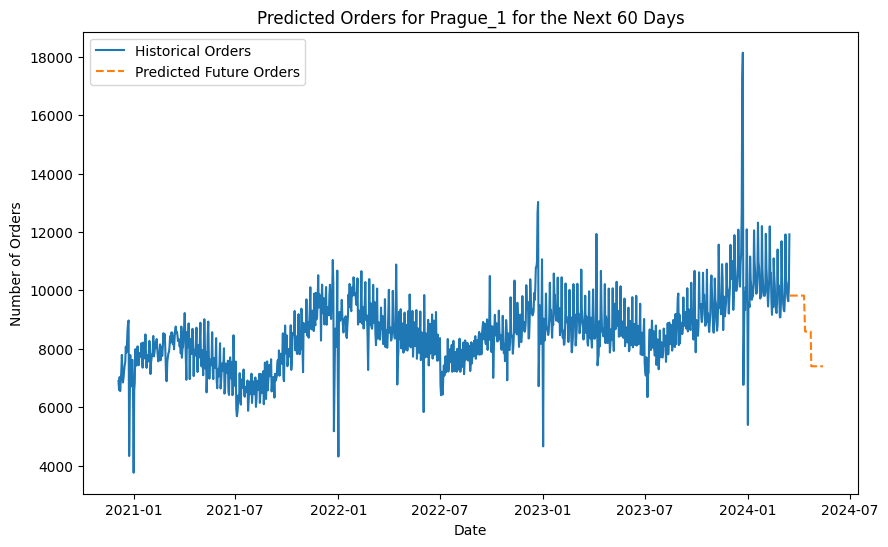

CPU times: user 544 ms, sys: 164 ms, total: 708 ms
Wall time: 437 ms


In [37]:
%%time

# Visualize the predicted orders
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(warehouse_data.index, warehouse_data['orders'], label='Historical Orders')
plt.plot(future_dates, predicted_future_orders, label='Predicted Future Orders', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.title(f'Predicted Orders for {selected_warehouse} for the Next 60 Days')
plt.legend()
plt.show()

In [39]:
%%time

num_predictions_needed = len(sample_submission) 

CPU times: user 19 µs, sys: 5 µs, total: 24 µs
Wall time: 28.4 µs


In [40]:
%%time

# Simulate hidden state transitions for the required number of predictions
simulated_hidden_states = [np.random.choice(np.arange(n_hidden_states), p=hmm_model.transmat_[hidden_states_test[-1]])]
for _ in range(num_predictions_needed - 1):
    next_hidden_state = np.random.choice(np.arange(n_hidden_states), p=hmm_model.transmat_[simulated_hidden_states[-1]])
    simulated_hidden_states.append(next_hidden_state)
    
# Generate the predicted orders for the required number of days
predicted_future_orders = hmm_model.means_[simulated_hidden_states].flatten()

CPU times: user 16.2 ms, sys: 3.98 ms, total: 20.2 ms
Wall time: 18.1 ms


In [41]:
%%time

#  Create a DataFrame for the predicted orders for submission
submission_df = sample_submission.copy()
submission_df['orders'] = predicted_future_orders[:len(submission_df)]

CPU times: user 581 µs, sys: 0 ns, total: 581 µs
Wall time: 537 µs


In [42]:
%%time

submission_df.head()

CPU times: user 185 µs, sys: 0 ns, total: 185 µs
Wall time: 167 µs


,id,orders
0,Prague_1_2024-03-16,9217.508202
1,Prague_1_2024-03-17,9217.508202
2,Prague_1_2024-03-18,9217.508202
3,Prague_1_2024-03-19,8589.063893
4,Prague_1_2024-03-20,8589.063893


In [43]:
%%time

# Save the submission file
submission_file_path = 'submission.csv'
submission_df.to_csv(submission_file_path, index=False)

CPU times: user 4.25 ms, sys: 2.07 ms, total: 6.31 ms
Wall time: 6.12 ms
